## Introduction

KKBox's Churn dataset consist of churn, member, transaction, and user information.
<br>Number of Observations
1. churn: 20,000
2. member: 17,660
3. transaction: 23,588
4. user: 277,101

In [1]:
#loading the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
#loading the requisite files

churn_df = pd.read_csv('trunc_churn.csv')
members_df = pd.read_csv('trunc_members.csv')
transact_df = pd.read_csv('trunc_transaction.csv')
users_df = pd.read_csv('trunc_users.csv')

First let's have a look at the various datasets supplied

In [3]:
churn_df.sample(10)

,msno,is_churn
15637,n+vAXxhh32ejDnRzkJviGAln/NnNtY6eTxvpbn/Qjms=,0
8690,yQ9JlojFKPRNoqVwn+BW3HxtyKwSBId2IZKEXQMDXZc=,0
4353,AeoeT3B2aA+mu4w8+3n3v0uhnw1e5s9ozq0otxXQiPg=,0
15946,jA8Zscba2vzt/dj4RLb7kBHpJ+mcpG8icYIYKJZ3fmE=,0
5440,dGVh2tyYfm+7yLlLUxJH5EX7PJq7Ux1Tb966uPNqQIU=,1
16653,Qgzvof7FGkvV5ZsKICB+elPls43lQqzpqcFy5F3apqg=,0
10407,ip4e/ZqAIBpbSckgNEUtXEBDH9mcfbr4SfAbvciqpk0=,0
580,vg+QL04sOCSObeXU69EJiHO2NImLRK67ahyuBpVzFeA=,0
15129,lvEKtUexkUh5MeEu5c1hpuIsZfFen8Td3dScEKmowJw=,0
5871,f6JRIzIrVVKB0aaHLVt6G5ME8AFXw6ry7E0odAoclwk=,0


In [4]:
churn_df.shape

(20000, 2)

In [5]:
members_df.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time
6914,OIZfuyvsz+YzkI24sMqBM1tOCC7aLEL5pCQJagZ8YBA=,6,34,female,3,20141128
4558,gJqHatTYZCqARtAXinEm2ei3X1KTtlF9DjPAVXJPnTc=,9,32,male,7,20100620
5389,4+WbKpOeXYQzhuJYRqfSCC5C0IsRJ1EI5roNyGSCbPM=,1,0,NaN,7,20170228
16269,YbDd9donFGGfJ5z/oUXtVOM36MG6BF0Us6cInT30D80=,13,24,female,3,20140623
10349,+DfGrv4JmepHNCKYhRHRGNgZeD92ObcrBmWrbBjj7zw=,13,22,male,9,20070516
9970,1YI+HPeWmn9zl8jCaxQupW++PuA9fC1tgZ45Q8DE8ks=,1,0,NaN,7,20130909
11737,8v1z5yqFRhkHY/JLklHnHix/4q6kyQ0sEx0yuB7To9c=,4,21,male,3,20120530
1564,NXCLN3YLYJEs4OX0h40gp3hjbWR4oOm5JERxHZ3Uf+8=,1,0,NaN,7,20110520
16651,2tCu+zc6YkQa0Io6szO2ABvB3/IxOH/KZMbVnqeiDfI=,1,0,NaN,7,20131118
16403,pNqCZnuwM9F+jGi1dYF6C/tUzoOK9WRIrmvKV8r06XY=,1,0,NaN,7,20151027


In [6]:
members_df.shape

(17660, 6)

In [7]:
transact_df.sample(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1640,NMuDEwn4o96fhrkX6OCeOzzInfsKeR96UzOvSBEqprI=,37,30,149,149,1,20170321,20170427,0
112,16mlNT+cNH09213wo8lzcV9G+GNNHe6eJv8eAT4sO8o=,41,30,129,129,1,20170309,20170409,0
7179,OXMzmOyTrZ+6STG69CB9n4q4V1xINZphRrFRpoFVRno=,41,30,100,100,1,20170325,20170425,0
10604,smLDNJXQZGFmHmty3E31f8/eeCpE4pjkhxdFaJIeLN8=,41,30,149,149,1,20170318,20170418,0
2249,YHQpRfrj6fW7Bk6KRrFrkOH4blTlAdMX6b9JuD+3Ld4=,40,30,149,149,1,20170303,20170410,0
2007,O3rNjTDHCgI53nG8fMgFpR942Jitd8ziqFtxCJtNrck=,41,30,129,129,1,20170331,20170430,0
20856,MCxGQjX0V2+7yLfcmo9U/afjjGkIccwPceyqZMwCJ5I=,37,30,149,149,1,20170323,20170430,0
16431,GEGxAEVXA6WZM9LlUgaoa88pocPgALzlDf95/UIrNPI=,41,30,149,149,1,20170310,20170410,0
6539,r24gG6LkD75hZImFcaWvyptaEYu7VOhMsQ29ZYrGIZY=,41,30,99,99,1,20170317,20170417,0
18658,2sqn6KXOGWOVWqb6Ht+TO81zL8PxMrhXblS2p47nNgM=,41,30,99,99,1,20170304,20170404,0


In [8]:
transact_df.shape

(23588, 9)

In [9]:
users_df.sample(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
195640,GPf1aG5b7F9bcBRRYLYROM9BV3juKcIOMyHZBZnXnPE=,20170307,1,0,1,0,4,4,1002.578
219577,n5kxrgD0bQsXZi5fpH/bpbqh29XQIu4gyJqhvqI4HJA=,20170310,7,4,2,2,23,34,6561.526
253870,KO8cmdgvl7VkiuUseWgjs1qhdKBkwWUTugejX2MAKAM=,20170308,3,1,0,0,20,17,4801.576
31665,P3fhGf20o7wg7hDAMaNyCFCCdH9Hn56Qj5NK8UKwleU=,20170331,2,0,0,0,12,7,3927.971
245670,pNDrdgB40z1/Pv1CDfy09lN4kuVoa8QMIC7epwXPNls=,20170308,7,0,0,1,9,9,2354.597
39595,FeDhQlvcpr7HcuUR9SaDimfBb+XOuWbcIOw14DxiPVY=,20170308,3,1,1,0,1,5,538.355
188733,O/PuKLgNdJ2xIkz++oFumRpallfxqh95tMHRWno9CS0=,20170301,12,3,3,3,64,71,17367.391
206304,nycv/Od+h9gMlf9WnruXQ8Hg8rcprJZGe8qGcgI8Tms=,20170308,3,1,0,1,97,32,25845.324
174868,j9R8r9ETzmYfKQUEbt1f/OQb048teXsWSzLB2J39LhI=,20170313,0,0,0,0,14,14,3359.790
49088,+TFy16iewlC5bG98o3PU94UjAjH1tNWeUZ4pSsdLQD0=,20170323,6,4,1,0,18,25,4826.726


In [10]:
users_df.shape

(277101, 9)

In [11]:
len(users_df['msno'].unique())

15457

In [12]:
users_df.shape[0] + transact_df.shape[0] + members_df.shape[0] + churn_df.shape[0]

338349

## Data Processessing

We notice that several of the dataframes have a column that is likely to be a timestamp. From the dictionary, we are told  they are supplied in the YYYY/MM/DD format. The following code chunk will convert them into date time stamps.

In [13]:
col_list = [(members_df,'registration_init_time'), (transact_df,'transaction_date'),
            (transact_df,'membership_expire_date'),(users_df,'date')]

for df, col in col_list:
    df[col] = pd.to_datetime(df[col],format='%Y%m%d')

In [14]:
users_df.sample(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
194120,E+rdFgoNMkeJKrCsHbb9ewZG3diitIPFlvXn6A6PY78=,2017-03-30,1,5,10,0,0,16,2264.452
217443,nxaBspl+lcEgrbcMEDfvrV33h6oGGqgXRcjpSzVigX0=,2017-03-18,8,0,0,0,13,21,3227.603
76299,Wi7G80sluFy4MzYY2VGqy6VA5H1unoXMZ7e/mLmM4TY=,2017-03-29,0,0,3,0,2,5,957.856
125819,aGuX2yFv9erXtpvBNuYwjBEJy79gmChzjcTgrij2WDk=,2017-03-15,0,0,0,0,5,5,1252.938
196984,/fNTEF3bXCEvKHbpBOXbA5uTs581kPQp+ktwxAXmchY=,2017-03-09,5,0,0,0,5,9,1477.113
258953,fk5GycBV4PmNvRHlRtpfVam4UkbsrEEvp5hgBDKpERU=,2017-03-05,7,4,0,0,20,21,5112.621
247612,kTCGR98+7FoAmFtYsEnxvxA+rUDw/ur7Jy5u9I/wLMw=,2017-03-17,59,9,8,6,67,125,18982.126
92818,9+tMTyN+PIgG1kijGFo7l6Kb0Syl2/IXiCToB0gVOKg=,2017-03-08,20,6,4,1,44,25,10043.681
259845,mnJyNjI3gUUYqNI7FO1VAF6N+iJlgkRKEJ0mMOoxb0U=,2017-03-08,0,0,0,0,4,4,873.520
20739,cQBqsLBetSXsUXVNUJphNmejGk7J7Lh7soyJ6W6YepM=,2017-03-29,2,2,0,0,4,6,1108.058


## Merge Data

* Merged both members and transact dataframe to yield customers.
* Merged customers dataframe and churn to yield final df. 
* Open to explore users later on, if there's time.

In [15]:
customers = members_df.merge(transact_df, on="msno", how = "outer")

In [16]:
transact_df.shape[0] + members_df.shape[0]

41248

In [17]:
customers.shape

(24334, 14)

In [18]:
customers.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
16833,SsBQ5frVPzKsZNwPkUtYs7le/+9bEjy/A/Cluisf5qU=,1.0,0.0,NaN,7.0,2017-02-07,41.0,30.0,99.0,99.0,1.0,2017-03-06,2017-04-06,0.0
15226,x8GetECKxq6WwVg0tf0fCLz0xles5rsijokaoWDGDHk=,1.0,0.0,NaN,7.0,2016-06-09,41.0,30.0,99.0,99.0,1.0,2017-03-09,2017-04-09,0.0
570,x7+r04Nhwcc5Vh+871m8SHhEK910MdKibDb7FrPLLkM=,13.0,29.0,male,9.0,2006-06-23,37.0,30.0,149.0,149.0,1.0,2017-03-24,2017-04-23,0.0
14990,6sOfVN5gzas8AXh5pKRrp5ZLW2eccn0ytaXcYzVyP0c=,15.0,31.0,female,7.0,2012-11-06,41.0,30.0,149.0,149.0,1.0,2015-04-21,2018-05-20,0.0
6512,bUSzuouJ24XGhGrtBVXKesMCxx9vIkbocs1LVVfbuec=,1.0,0.0,NaN,7.0,2010-10-06,41.0,30.0,99.0,99.0,1.0,2017-03-08,2017-04-08,0.0
1342,6jDr4MkHnMcHkioLVB2GPLGJdkE8whAzkIAMYs90JaM=,5.0,21.0,female,3.0,2013-09-09,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-04-15,0.0
14515,+ajCOv3puu+HNxpgT91rXzlnvHJ+KejU61Q2VwCvH/w=,5.0,0.0,male,9.0,2011-11-15,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-04-11,0.0
12099,FjEfd3IcDwh0gwgDk70UX/h0nm8GB8CWQfNczntOvoQ=,1.0,0.0,NaN,7.0,2016-12-30,41.0,30.0,99.0,99.0,1.0,2017-03-31,2017-04-30,0.0
11113,KItPdWx7rzQmjsMWmiGvdT7YpuY3q2e2ioE/V0+aPWM=,1.0,0.0,NaN,7.0,2013-06-12,41.0,30.0,99.0,99.0,1.0,2017-03-25,2017-04-25,0.0
12917,d0/uvzfQ1Nj8nh/gV2ALfJwz0X7sPHcxIKZt/9W9l+g=,1.0,0.0,NaN,7.0,2011-08-16,41.0,30.0,129.0,129.0,1.0,2017-03-25,2017-04-26,0.0


In [19]:
churn_df.shape

(20000, 2)

In [20]:
df = customers.merge(churn_df, on = 'msno', how = 'outer')
df.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn
12928,yy4nFWM9dNpeK3q4yQPMFvNQ5n/0uOVs+1HXxQzLyTo=,1.0,0.0,NaN,4.0,2016-05-30,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,1
9474,AaZZU258Oc2XAEWKQbDIDJdmw68gcSKj/q5LfppUHuE=,1.0,0.0,NaN,7.0,2016-02-18,41.0,30.0,99.0,99.0,1.0,2017-03-18,2017-04-18,0.0,0
7552,w9jOZEXsnwMb0DGGWrsjf+jOgxvzv+2AGqUPl7J0Pqg=,4.0,33.0,male,9.0,2004-09-22,40.0,30.0,149.0,149.0,1.0,2017-03-04,2017-04-10,0.0,0
9907,QbhQFd5gWNzSrdTsd2o0mKboes8Vmqnc4bAliaAKsMs=,1.0,0.0,NaN,7.0,2016-05-28,41.0,30.0,99.0,99.0,1.0,2017-03-16,2017-04-16,0.0,0
23156,2GZUdk9Hviwpp5coMGltKszStxKQ8dbKkn6/UjZ7YrI=,NaN,NaN,NaN,NaN,NaT,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-04-08,0.0,0
5869,r3Ypkm082bPuoNm795VYgfyvUv/978cfvVrBK60kYTE=,1.0,0.0,NaN,7.0,2016-09-23,41.0,30.0,99.0,99.0,1.0,2017-03-22,2017-04-22,0.0,0
24369,MKwP/f03tB78CbTT7Qm10xTEbphLqhPtm5/Fj6zfu0Y=,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,1
21719,+o4GOFxDT8BOHVMqN4fCbq8pNPzaD0EyVJxWDFq7NJc=,1.0,0.0,NaN,7.0,2010-11-09,41.0,30.0,99.0,99.0,1.0,2017-03-21,2017-04-22,0.0,0
11308,r6oKCDI+P83gB+euBvvoP5b4STKIdDX6DkPD4TClB0U=,5.0,25.0,female,3.0,2013-02-13,36.0,30.0,180.0,180.0,1.0,2017-03-09,2017-03-08,1.0,0
13564,f9T5Tm5zdEG2hc+CE62DaZDNyqraAgeDbMz7Z+P3uPo=,1.0,0.0,NaN,7.0,2016-06-15,41.0,30.0,99.0,99.0,1.0,2017-03-14,2017-04-14,0.0,0


Bd column contains age 0. Replaced age 0 with null value

In [21]:
df.shape

(24372, 15)

In [22]:
df['bd'] = df['bd'].replace(0,np.nan)

## Data Exploration

The following are a starter demonstration of what you can do in your exploration of this dataset.
It's common to examine and then organize your features under categorical or numerical. Pandas has a built in method to transform into a pandas datetime object that we used earlier. If you use R, you'll want to look into the xts or lubridate library instead.

In [23]:
df.describe()

,city,bd,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,is_churn
count,21847.000000,10430.000000,21847.000000,23588.000000,23588.000000,23588.000000,23588.000000,23588.000000,23588.000000,24372.000000
mean,6.250790,30.179482,6.881952,38.894353,33.477065,145.801594,145.277260,0.917246,0.028150,0.123379
std,6.532179,13.497509,1.949450,3.853128,30.832811,128.894447,129.060597,0.275516,0.165405,0.328879
min,1.000000,-46.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,7.000000,39.000000,30.000000,99.000000,99.000000,1.000000,0.000000,0.000000
50%,4.000000,28.000000,7.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,0.000000
75%,13.000000,34.000000,9.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,0.000000
max,22.000000,1043.000000,13.000000,41.000000,450.000000,1788.000000,1788.000000,1.000000,1.000000,1.000000


In [24]:
df.dtypes

msno                              object
city                             float64
bd                               float64
gender                            object
registered_via                   float64
registration_init_time    datetime64[ns]
payment_method_id                float64
payment_plan_days                float64
plan_list_price                  float64
actual_amount_paid               float64
is_auto_renew                    float64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                        float64
is_churn                           int64
dtype: object

In [25]:
col_list = df.columns
null_list = {}
for i in df:
    for e in col_list:
        null_list[e] = (df[e].isnull().sum())/len(df)

In [26]:
sorted(null_list.items(), key=lambda x: x[1])

[('msno', 0.0),
 ('is_churn', 0.0),
 ('payment_method_id', 0.0321680617101592),
 ('payment_plan_days', 0.0321680617101592),
 ('plan_list_price', 0.0321680617101592),
 ('actual_amount_paid', 0.0321680617101592),
 ('is_auto_renew', 0.0321680617101592),
 ('transaction_date', 0.0321680617101592),
 ('membership_expire_date', 0.0321680617101592),
 ('is_cancel', 0.0321680617101592),
 ('city', 0.10360249466601018),
 ('registered_via', 0.10360249466601018),
 ('registration_init_time', 0.10360249466601018),
 ('bd', 0.5720498933202035),
 ('gender', 0.5735680288856064)]

### <font color = "green">City</font> Value Counts:
Although Cities 16 and 20 had the lowest churn, they consisted less than 0.15% of the members.
<br>Notably, City 1.0 makes up 43.67% of the member population, and had one of lowest churn rates at only 10.97%.
<br>
<br>Segmented the City whether there is **high** or **low** member population: df[city_member_pop]

/Users/thisbekristin/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='city', ylabel='count'>

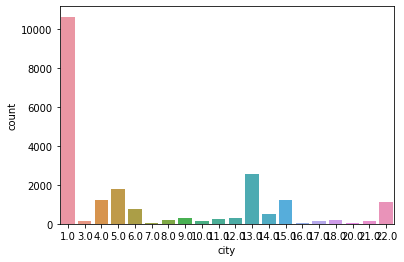

In [27]:
sns.countplot(df['city'])

<AxesSubplot:xlabel='city'>

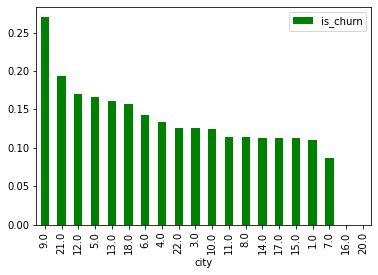

In [28]:
df.groupby('city')[['is_churn']].mean().sort_values(ascending=False, by='is_churn').plot.bar(color='g')

In [29]:
df['city_member_pop'] = pd.cut(df['city'], bins = [0,1,22],labels=['high','low'])

In [30]:
df['city_member_pop'].value_counts()

low     11204
high    10643
Name: city_member_pop, dtype: int64

In [31]:
df.groupby('city_member_pop')[['is_churn','is_auto_renew']].mean()

,is_churn,is_auto_renew
city_member_pop,,
high,0.109743,0.938006
low,0.145216,0.878274


### <font color = "red"> Bd (Age)</font> Null Values:
After replacing 0 with NaN, more than half of the ages are null. 

In [32]:
df['bd'].value_counts(dropna=False,normalize = True)

NaN     0.572050
27.0    0.025234
25.0    0.024783
26.0    0.023182
29.0    0.023141
          ...   
4.0     0.000041
81.0    0.000041
72.0    0.000041
66.0    0.000041
71.0    0.000041
Name: bd, Length: 76, dtype: float64

<AxesSubplot:xlabel='bd', ylabel='Count'>

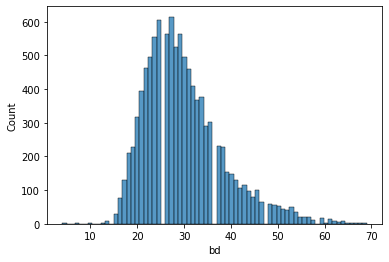

In [33]:
bd_df = df.loc[np.abs(df.bd - df.bd.mean())/ df.bd.std() < 3]
sns.histplot(bd_df['bd'])

In [34]:
bd_df.groupby('city')[['bd']].agg([np.mean,np.median])

bd       
           mean median
city                  
1.0   27.562893   25.0
3.0   30.116667   28.0
4.0   29.090246   27.0
5.0   31.563512   30.0
6.0   29.845255   28.0
7.0   29.080000   27.5
8.0   27.373494   26.0
9.0   29.471014   28.0
10.0  29.568627   28.0
11.0  28.321739   27.0
12.0  27.644928   27.0
13.0  30.784322   29.0
14.0  30.647436   29.0
15.0  29.441712   29.0
16.0  29.476190   29.0
17.0  29.850000   27.5
18.0  28.156250   27.0
20.0  29.111111   32.0
21.0  25.872727   25.0
22.0  29.871622   29.0

Created categories based on age group:
* Minor: <= 18
* Adult: 19 - 60
* Senior: 60+

In [35]:
df['age_group'] = pd.cut(df['bd'],bins = [13,21,37,53,71],labels=['GenZ','Millennial','GenX','Boomer'])
bd_df['age_group'] = pd.cut(bd_df['bd'],bins = [13,21,37,53,71],labels=['GenZ','Millennial','GenX','Boomer'])

/Users/thisbekristin/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df['age_group'].value_counts(dropna=False)

NaN           13969
Millennial     7315
GenX           1522
GenZ           1394
Boomer          172
Name: age_group, dtype: int64

In [37]:
bd_df.groupby('age_group')[['bd']].agg([np.min,np.max])

bd      
            amin  amax
age_group             
GenZ        14.0  21.0
Millennial  22.0  37.0
GenX        38.0  53.0
Boomer      54.0  69.0

In [38]:
bd_df.groupby('age_group')[['is_churn','is_auto_renew']].mean()

,is_churn,is_auto_renew
age_group,,
GenZ,0.263271,0.555112
Millennial,0.138483,0.899233
GenX,0.142576,0.952607
Boomer,0.116959,0.950920


In [39]:
bd_df.shape

(10407, 17)

### <font color = "red">Gender</font> Null Values:
Since gender is missing more than half of its values, it will not be a useful customer segment

/Users/thisbekristin/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

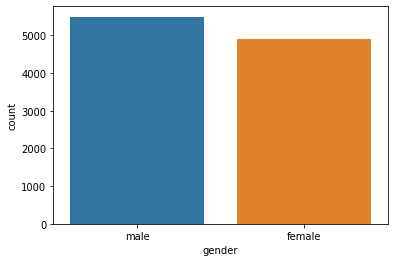

In [40]:
sns.countplot(df['gender'])

### <font color = "green">Registered_Via</font> Value Counts:
Despite 13 having the lowest churn, there are less people under that plan. More members were registered_via 7.0, and yielded the lowest churn considering the number enrolled.


In [41]:
df['registered_via'].value_counts(dropna=False)

7.0     11624
9.0      6052
3.0      2809
NaN      2525
4.0      1291
13.0       71
Name: registered_via, dtype: int64

<AxesSubplot:xlabel='registered_via', ylabel='count'>

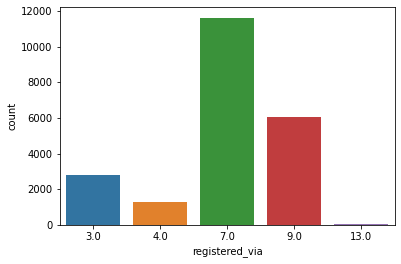

In [42]:
pop_registered_via = pd.DataFrame(df['registered_via'].value_counts(dropna=False)).reset_index()
pop_registered_via.columns = ['registered_via','count']
sns.barplot(x='registered_via',y='count',data=pop_registered_via)

In [43]:
registered_via = pd.DataFrame(df.groupby('registered_via')[['is_churn','is_auto_renew']].agg('mean').sort_values(by='is_churn',ascending=False)).reset_index()
registered_via

,registered_via,is_churn,is_auto_renew
0,4.0,0.249419,0.630796
1,3.0,0.170879,0.760477
2,9.0,0.144085,0.854514
3,7.0,0.096266,0.994274
4,13.0,0.028169,1.000000


<AxesSubplot:xlabel='registered_via', ylabel='is_churn'>

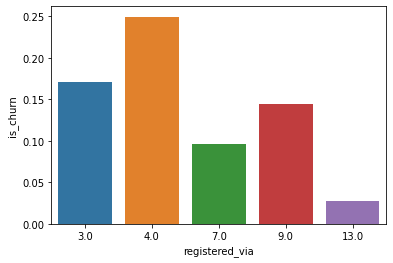

In [44]:
sns.barplot(x='registered_via', y='is_churn', data=registered_via)

### Payment_Method_id Value Counts:
The most payment_method_id used is **41**.

In [45]:
df['payment_method_id'].value_counts(dropna=False).head(20)

41.0    13302
39.0     2840
40.0     1590
36.0     1512
38.0      982
NaN       784
37.0      769
34.0      631
29.0      418
30.0      396
33.0      298
31.0      224
32.0      194
15.0       52
19.0       49
17.0       45
21.0       45
27.0       43
28.0       43
23.0       42
Name: payment_method_id, dtype: int64

<AxesSubplot:xlabel='payment_method_id', ylabel='count'>

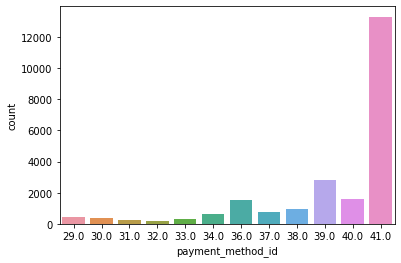

In [46]:
pop_payment = pd.DataFrame(df['payment_method_id'].value_counts(dropna=False)).reset_index().head(13)
pop_payment.columns = ['payment_method_id','count']
sns.barplot(x='payment_method_id',y='count',data=pop_payment)

#### Further exploration for payment methods over 36

In [47]:
payment = df[df['payment_method_id'] >= 36]

In [48]:
payment.groupby(['payment_method_id','city_member_pop'])[['is_churn','is_auto_renew']].mean().sort_values(by='payment_method_id',ascending=True)

is_churn  is_auto_renew
payment_method_id city_member_pop                         
36.0              high             0.113786       0.671772
                  low              0.093839       0.729858
37.0              high                  NaN            NaN
                  low              0.038360       1.000000
38.0              high             0.318681       0.000000
                  low              0.280389       0.000000
39.0              high             0.000000       1.000000
                  low              0.056835       1.000000
40.0              high             0.000000       1.000000
                  low              0.072289       1.000000
41.0              high             0.076143       1.000000
                  low              0.141543       1.000000

### Payment_Plan_Days
Popular length of membership plan is **30** days

In [49]:
df['payment_plan_days'].value_counts(dropna=False)

30.0     23067
NaN        784
410.0       82
90.0        76
195.0       67
180.0       63
0.0         40
240.0       38
60.0        36
7.0         30
360.0       29
100.0       18
120.0       14
395.0        6
200.0        5
400.0        4
1.0          3
450.0        2
80.0         2
365.0        2
70.0         1
415.0        1
14.0         1
110.0        1
Name: payment_plan_days, dtype: int64

In [50]:
len(df['payment_plan_days'])

24372

In [51]:
payment.groupby(['payment_plan_days'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

,is_churn
payment_plan_days,
30.0,0.083365
0.0,0.175000
7.0,0.444444
90.0,0.947368
14.0,1.000000
110.0,1.000000
120.0,1.000000
180.0,1.000000
195.0,1.000000


In [52]:
payment_plan = df[df['payment_plan_days']==30]
payment_plan.groupby(['registered_via'])[['is_churn','is_auto_renew']].mean().sort_values(by='is_churn',ascending=True)

,is_churn,is_auto_renew
registered_via,,
13.0,0.014286,1.000000
9.0,0.074416,0.891182
3.0,0.084376,0.798547
7.0,0.086528,0.997293
4.0,0.117813,0.679548


### Plan_List_Price

In [53]:
df['plan_list_price'].value_counts(dropna=False)

149.0     11796
99.0       7630
180.0      1930
129.0       974
NaN         784
100.0       687
0.0         115
1788.0       85
894.0        68
536.0        52
1200.0       49
300.0        41
150.0        31
477.0        22
447.0        19
480.0        15
298.0        12
600.0        12
1599.0       11
119.0        11
120.0         6
35.0          5
930.0         4
500.0         3
400.0         2
799.0         2
450.0         2
131.0         1
1299.0        1
1000.0        1
350.0         1
Name: plan_list_price, dtype: int64

In [54]:
payment_plan.groupby(['payment_plan_days','plan_list_price'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

is_churn
payment_plan_days plan_list_price          
30.0              131.0            0.000000
                  100.0            0.027656
                  99.0             0.044168
                  150.0            0.064516
                  149.0            0.099610
                  180.0            0.107254
                  129.0            0.162218
                  120.0            0.333333
                  119.0            0.545455
                  0.0              1.000000

### Actual_Amount_Paid

In [55]:
df['actual_amount_paid'].value_counts(dropna=False)

149.0     11704
99.0       7643
180.0      1867
129.0       983
NaN         784
100.0       687
0.0         162
119.0        99
1788.0       85
894.0        68
536.0        52
1200.0       49
300.0        41
150.0        31
477.0        22
447.0        19
480.0        15
600.0        12
298.0        12
1599.0       11
35.0          5
930.0         4
120.0         4
500.0         3
400.0         2
799.0         2
450.0         2
1299.0        1
1000.0        1
131.0         1
350.0         1
Name: actual_amount_paid, dtype: int64

In [56]:
payment_plan.groupby(['payment_plan_days','actual_amount_paid'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

is_churn
payment_plan_days actual_amount_paid          
30.0              120.0               0.000000
                  131.0               0.000000
                  100.0               0.027656
                  99.0                0.044093
                  150.0               0.064516
                  180.0               0.096411
                  149.0               0.098081
                  129.0               0.162080
                  119.0               0.186813
                  0.0                 0.545455